# pandas 소개 2

__자료 안내:__ 
[pandas 라이브러리 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)에 
있는 Lessons for new pandas users의 [02-Lesson](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb) 내용을 담고 있다.

In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [2]:
# 쥬피터 노트북에서 그래프를 직접 나타내기 위해 사용하는 코드
# 파이썬 전문 에디터에서는 사용하지 않음
%matplotlib inline

## 데이터 생성

여기서는 
[pandas 소개 1](https://github.com/liganega/Gongsu-DataSci/blob/master/notes/GongSu15-Pandas-tutorial-01.ipynb)에서 
다루었던 데이터보다 훨씬 많은 데이터를 생성하고 활용하는 예제를 다룬다.

이전에 다룬 데이터는 1880년도에 신고된 아래 5명의 신생아 이름의 출생수였다.

In [3]:
names = ['Bob','Jessica','Mary','John','Mel']

여기서는 위 5개의 이름을 이용하여 1000개의 이름을 무작위로 생성한다. 
이렇게 하는 이유는 생성할 데이터가 1880년에 등록된 1000개의 이름과 해당 이름의 출생아수로 구성되도록 
보여지게 하기 위해서이다.

위 5개의 이름을 무작위로 반복 선택하여 생성된 1000개의 데이터에는 동일 이름이 여러 번 등장하게 만들 것이다. 예를 들어, Bob이란 이름이 여러 번 등장할 수 있는데, 이는 서로 다른 병원에서 Bob이라는 이름으로 태어난 아이의 수를 
서로 각자 보고했기 때문이라고 생각하면 된다.

먼저, 위 리스트에서 언급된 다섯 개의 이름을 이용하여 신생아 이름의 집합을 임의로 생성하는 방법을 살펴 보자.
위 5개의 이름을 이용하여 임의로 생성된 1000개의 아이 이름으로 구성된 리스트를 만들기 위해서는
아래 두 가지 수단을 사용한다.

* 0과 4 사이에서 임의로 하나의 수를 선택
* 선택된 수에 해당하는 색인(인덱스)에 위치한 이름을 `names` 리스트에서 선택

이를 위해서 `seed`와 `randint`함수를 이용한다.

* `seed` 함수
    * `randint` 함수처럼 난수를 생성하는 함수들은 __미리 생성된__ 난수표에 있는 숫자들을 
        미리 정해진 순서대로 0번부터 차례대로 선택해서 리턴한다.
    * 즉, 난수가 사실은 진짜 100% 무작위로 생성된 숫자가 아니라는 말이다.
    * 이 약점을 보완하기 위해 난수표의 몇 번째 숫자부터 읽을 것인가를 지정한다.
    * 무작위성을 보다 강화하기 위해 경우에 따라 난수표에 저장된 숫자들 중에서 
        몇 번째부터 읽을 것인가도 난수로 정할 수도 있다.
    * 예를 들어, `seed(500)`는 501번째 숫자부터 난수를 읽으라고 설정하는 명령이다.
    * 이렇게 해도 무작위성이 100% 포장되지는 않는다. 
        실제로 아래 코드는 매번 실행할 때마다 동일한 결과를 낳는다.
    * 실제로 무작위성을 100% 보장하는 일은 불가능하다. 
        대신에 얼마나 무작위성을 높이느냐가 핵심이며, 상황에 따라 그 정도를 달리 할 뿐이다.
* `randint` 함수
    * 지정된 구간 사이에서 정수를 임의로 선택하여 리턴하는 함수
    * 예를 들어, `randint(low = 0, high= len(names))`는 0과 `names` 리스트의 길이 사이에서
        정수를 임의로 선택하여 리턴
* `names[n]`: `names` 리스트에서 색인이 `n`인 위치에 있는 항목을 되돌려줌.

아래 코드는 0에서 4사이에서 임의로 선택된 정수에 해당하는 이름을 `names` 리스트에서 선택하는 과정을 1000번 반복하여 
`random_names`라는 리스트를 생성한다. 

__주의:__ 리스트 조건제시법을 활용하였음.

In [4]:
# 무작위성 키우기
random.seed(500)

# 리스트 조건제시법을 활용하여 1000개의 이름 생성
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# 앞의 10개 확인
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

위 코드에서는 아래 프로세스가 1000번 반복해서 호출된다. 

```python
random.randint(low=0,high=len(names))
```

따라서 아래와 같이 위 프로세스를 함수로 추상화하여 코드를 보다 이해하기 쉽게 단순화시킬 수 있다.
즉, 가독성을 높힌다.

__프로세스__: 코드의 일부를 가리킴

In [5]:
# 무작위성 키우기
random.seed(500)

# 리스트 조건제시법을 활용하여 1000개의 이름 생성
# random.randint(low=0,high=len(names))는 

# 난수 생성 프로세스의 추상화
def randIndex(): 
    return random.randint(low=0,high=len(names))

random_names = [names[randIndex()] for i in range(1000)]


# 앞의 10개 확인
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

이제 0부터 1000 사이의 정수를 무작위로 1000개 생성하자. 
이렇게 생성된 숫자들은 앞서 무작위로 생성된 아동이름의 출생수로 사용될 것이다.

In [6]:
# 1880년에 출생아동 명으로 신고된 아이들의 수
births = [random.randint(low=0,high=1000) for i in range(1000)]

# 처음 10개의 숫자 확인
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

앞서 언급한 대로 아동명수 출생아수를 짝을 짓도록 하자. 
`zip` 함수를 이용하여 `names`와 `births` 에 포함된 자료를 순서대로 짝지운다.

In [7]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

데이터를 완성하였다. 
하지만 이전에도 설명하였듯이 순서쌍들의 리스트는 활용면에서 효율적이지 않다.
대신에 `pandas` 모듈의 데이터 프레임으로 변환한 후에 
어떻게 활용할 수 있는지를 살펴볼 것이다.

In [8]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


얻어진 데이터 프레임을 `births1880.txt`라는 이름의 txt 파일로 저장해보자. 
이때, `to_csv`함수를 이용한다. 
매개변수 `index`와 `header`는 굳이 함께 저장할 필요가 없으므로 `False` 값으로 지정해 두자. 

In [9]:
df.to_csv('births1880.txt',index=False,header=False)

## 데이터 호출

앞서 csv 형식으로 저장한 데이터를 불러오기 위해, 
pandas의 `read_csv` 함수를 이용한다. 
`read_csv` 함수를 살펴보려면 아래와 같이 명령하면 된다.

> help(read_csv)

In [10]:
Location = 'births1880.txt'
df = pd.read_csv(Location)

`df`에 저장된 데이터에 대한 정보를 알기 위해 `info` 메소드를 사용한다.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


`info` 메소드는 아래 사실들을 말해준다.
* 999개의 데이터가 저장되어 있다.
* `Mary`라는 이름을 가진 열에는 999개의 값이 있다.
* `968`라는 이름을 가진 열에는 999개의 값이 있다.
* 두 개의 열 중에서 하나는 정수형 자료가 사용되고, 다른 열에는 정수가 아닌 다른 자료형이 사용된다.

`df`에 저장된 내용을 보기 위해서 `head()` 또는 `tail()`  메소드를 이용하면 된다. 
이는 앞에서부터 또는 뒤에서부터 5개의 행을 보여준다. 
n개의 자료가 보고 싶다면, 괄호안에 n을 쓰면 된다.

In [12]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [13]:
df. tail()

,Mary,968
994,John,151
995,Jessica,511
996,John,756
997,Jessica,294
998,John,152


위를 살펴보면, `read_csv` 메소드는 csv 파일의 첫 번째 행을 헤더(header)로 사용한다.
이는 csv 파일이 헤더를 따로 제공하지 않았기 때문이다. 
이를 해결하기 위해 `read_csv` 메소드를 호출할 때 `header` 키워드 인자의 값을 `None`으로 설정하면 된다.

In [14]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


이제 `info`가 다음과 같이 달라진 것을 확인할 수 있다.
* 데이터셋에는 1000개의 레코드가 있다.
* `0`라는 이름을 가진 열에는 1,000개의 값이 있다.
* `1`라는 이름을 가진 열에는 1,000개의 값이 있다.
* 두 개의 열이 있는데, 하나는 정수형 자료형을 사용하고, 다른 열은 정수형 이외의 자료형을 사용한다.

다시 `df`의 마지막 5개의 행을 확인해 보자.

In [15]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


만약 열에 특정한 이름을 사용하고 싶다면, 
`names`라는 매개변수를 사용한다. 
이때, `header` 매개변수는 생략가능하다.

In [16]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


숫자 0, 1, 2, 3, 4 등은 엑셀 파일에 있는 행의 숫자라고 생각하면 된다. 
pandas에서는 이것을 데이터 프레임의 색인(인덱스, index)라고 한다. 
`[Names, Births]`는 엑셀 스프레드시트의 열 이름(column header)을 담당한다고 생각하면 된다.

이제 저장된 txt 파일은 삭제해도 좋다.

In [17]:
import os
os.remove(Location)

## 데이터 클리닝(cleaning)

`df`에 저장된 데이터는 1880년에 태어난 아이의 이름과 출생수로 구성되어 있다. 
(물론 이 데이터는 우리가 연습용으로 임의로 만들었다.)

총 1,000개의 기록이 있고 결측치(missing value)는 없다. 
`Names` 열에 포함된 이름은 5개 뿐이다. 
(우리가 그렇게 만들었다.)
이 사실을 `unique` 메소드를 활용하여 확인 할 수 있다.

In [18]:
# 방법 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

`names` 열에 사용된 이름들은 애초에 우리가 지정한 5개의 이름임을 다시 한 번 확인할 수 있다.

__주의:__ `unique()` 메소드의 리턴값은 `array` 자료형이다.

만약 유일한 값을 print하고 싶다면 아래와 같이 작성하면 된다:

In [19]:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


`describe` 메소드를 활용하면 사용된 이름들의 정보를 종합적으로 확인할 수 있다.

In [20]:
# 방법 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [21]:
df['Names'].describe().freq

206

* 총 1000개의 자료 포함됨
* 5개의 이름만 사용됨
* `Bob` 이름이 가장 많이 사용됨
* `Bob` 이름이 총 206번 사용됨

`df`에 아이 이름이 여러 번 사용되었고 사용될 때마다 출생수와 연관되어 있다. 
따라서 하나의 이름과 연결된 출생아수를 모두 합하여 해당 이름이 모두 몇 번 사용되었는가를 
표시할 수 있다. 
이를 위해 `groupby()` 메소드를 이용한다. 

최종 결과는 미리 알고 있듯이 기존에 1000개의 행이 이제는 5개의 행으로 구성될 것이다.

In [22]:
# Names열을 기준으로 모둠화(그룹화)하기
# 즉, 이름별로 모둠 만들기
name = df.groupby('Names')

# 그런 다음에 각 모둠에 대해 sum() 메소드 적용하기
# 이름이 사용된 총 횟수 계산하기
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


## 데이터 분석

예를 들어, 가장 인기있는 이름 즉, 출생수가 가장 높은 이름을 찾기 위해서 다음 두 가지 방식 중에 
한 가지를 활용할 수 있다.

* 방법 1: 둘 째 열을 기준으로 내림차순으로 정렬한 후 첫째 행 선택
* 방법 2: 둘째 열에 대해 `max()` 함수 적용

__방법 1:__ 특정 열을 기준으로 내림차순으로 정렬하기

In [23]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted

,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


1행만 확인하려면 `head()` 메소드를 활용한다. 

In [24]:
Sorted.head(1)

,Births
Names,
Bob,106817


__방법 2:__ 특정 열에 대해 일괄적으로 `max()` 메소드 적용하기

In [25]:
df['Births'].max()

106817

## 데이터 시각화

`Births`열을 막대그래프로 나타내 보자. 
그래프를 보면, `Bob`이 가장 인기 있는 이름이라는 사실을 한 눈에 알 수 있다.

막대그래프는 `plot.bar()` 메소드를 활용한다.

In [26]:
import numpy as np

가장 인기 있는 이름은 아래와 같다.


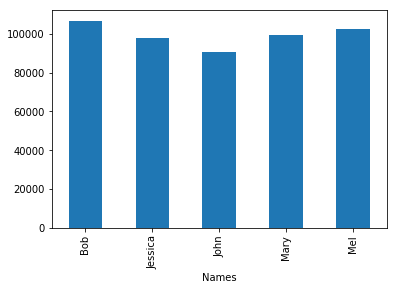

In [27]:
# 막대 그래프 만들기
print("가장 인기 있는 이름은 아래와 같다.")
df['Births'].plot.bar()
plt.show()